In [1]:
%ls ../../Datasets/from_candice/

time_series_15min_singleindex.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = '../../Datasets/from_candice/time_series_15min_singleindex.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.isnull().sum().sort_values(ascending=False)

HU_solar_generation_actual                    165745
DE_LU_load_forecast_entsoe_transparency       134982
DE_LU_load_actual_entsoe_transparency         131509
DE_LU_solar_generation_actual                 131451
DE_LU_wind_offshore_generation_actual         131422
                                               ...  
DE_50hertz_wind_onshore_generation_actual          6
DE_50hertz_wind_offshore_generation_actual         6
DE_50hertz_wind_generation_actual                  6
cet_cest_timestamp                                 0
utc_timestamp                                      0
Length: 61, dtype: int64

In [6]:
df.shape

(201604, 61)

In [7]:
# select Germany only for better data view
column_sl = df.filter(like='HU')

In [8]:
# let's select Hungary at first
hu_colns = [col for col in df.columns if col in ['utc_timestamp']+column_sl.columns.tolist()]

In [9]:
df_hu = df[hu_colns]

In [10]:
df_hu.head()

,utc_timestamp,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN
1,2014-12-31T23:15:00Z,NaN,NaN,NaN,NaN
2,2014-12-31T23:30:00Z,NaN,NaN,NaN,NaN
3,2014-12-31T23:45:00Z,NaN,NaN,NaN,NaN
4,2015-01-01T00:00:00Z,NaN,NaN,NaN,NaN


In [11]:
df_hu.isnull().sum()

utc_timestamp                                0
HU_load_actual_entsoe_transparency           6
HU_load_forecast_entsoe_transparency       194
HU_solar_generation_actual              165745
HU_wind_onshore_generation_actual         8583
dtype: int64

In [12]:
# format the timestamp
df_hu['utc_timestamp'] = pd.to_datetime(df_hu['utc_timestamp'])
# df_hu['cet_cest_timestamp'] = pd.to_datetime(df_hu['cet_cest_timestamp'])

In [13]:
df_hu.head()

,utc_timestamp,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual
0,2014-12-31 23:00:00+00:00,NaN,NaN,NaN,NaN
1,2014-12-31 23:15:00+00:00,NaN,NaN,NaN,NaN
2,2014-12-31 23:30:00+00:00,NaN,NaN,NaN,NaN
3,2014-12-31 23:45:00+00:00,NaN,NaN,NaN,NaN
4,2015-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN


In [14]:
df_hu.rename(columns={'utc_timestamp':'utc'}, inplace=True)

In [15]:
df_hu['year'] = df_hu.utc.dt.year
df_hu['month'] = df_hu.utc.dt.month
df_hu['day'] = df_hu.utc.dt.day
df_hu['hour'] = df_hu.utc.dt.hour
df_hu['minute'] = df_hu.utc.dt.minute

In [16]:
# take a look at the data now
df_hu.sample(5)

,utc,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual,year,month,day,hour,minute
50964,2016-06-14 20:00:00+00:00,4806.00,4548.29,NaN,27.05,2016,6,14,20,0
183175,2020-03-23 00:45:00+00:00,4031.56,3687.90,0.0,163.30,2020,3,23,0,45
183179,2020-03-23 01:45:00+00:00,3890.44,3592.76,0.0,158.61,2020,3,23,1,45
106438,2018-01-13 16:30:00+00:00,5570.18,5416.81,NaN,21.84,2018,1,13,16,30
72579,2017-01-25 23:45:00+00:00,4842.99,4869.14,NaN,NaN,2017,1,25,23,45


In [17]:
# drop the na
df_hu_cl = df_hu.fillna(value=0)

In [18]:
df_hu_cl.isnull().sum()

utc                                     0
HU_load_actual_entsoe_transparency      0
HU_load_forecast_entsoe_transparency    0
HU_solar_generation_actual              0
HU_wind_onshore_generation_actual       0
year                                    0
month                                   0
day                                     0
hour                                    0
minute                                  0
dtype: int64

In [25]:
df_hu_cl.shape

(201604, 10)

In [26]:
# group the data find the daily average
df_hu_min_avg = pd.DataFrame(df_hu_cl.groupby(by=['year','month','day','hour','minute']).mean())

In [27]:
df_hu_min_avg = df_hu_min_avg.reset_index()

In [28]:
df_hu_min_avg.drop(columns='utc',inplace=True)

In [29]:
df_hu_min_avg.sort_values(by=['year','month','day'],inplace=True)

In [30]:
df_hu_min_avg.sample(10)

,year,month,day,hour,minute,HU_load_actual_entsoe_transparency,HU_load_forecast_entsoe_transparency,HU_solar_generation_actual,HU_wind_onshore_generation_actual
168219,2019,10,19,5,45,4766.13,4529.68,58.62,6.03
114957,2018,4,12,10,15,5102.46,4897.49,0.00,53.78
185332,2020,4,14,12,0,4700.51,4504.46,476.26,278.64
741,2015,1,8,16,15,6084.77,5876.00,0.00,59.26
180029,2020,2,19,6,15,5859.80,5675.26,62.90,18.25
184818,2020,4,9,3,30,4057.05,4018.65,0.00,45.48
177110,2020,1,19,20,30,5289.77,5124.89,0.00,93.33
126900,2018,8,14,20,0,4948.18,4954.29,0.00,63.04
14392,2015,5,30,21,0,4133.39,3903.87,0.00,68.52
195557,2020,7,30,0,15,4172.66,3994.94,0.00,7.64


In [31]:
df_hu_min_avg.hour.unique()

array([23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22], dtype=int32)

In [33]:
df_hu_min_avg['HU_all_actual'] = df_hu_min_avg.HU_load_actual_entsoe_transparency+df_hu_min_avg.HU_solar_generation_actual+df_hu_min_avg.HU_wind_onshore_generation_actual

In [34]:
df_hu_min_avg['HU_diff'] = df_hu_min_avg.HU_load_forecast_entsoe_transparency - df_hu_min_avg.HU_all_actual

<Axes: >

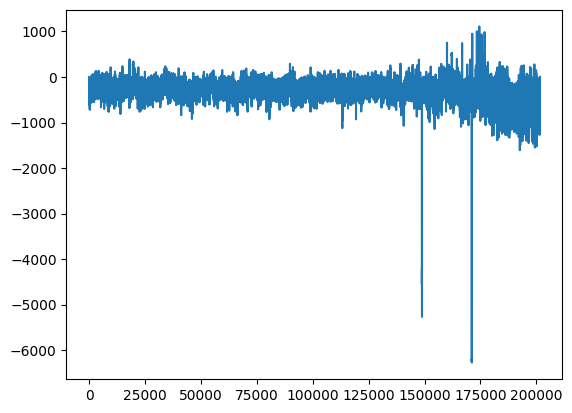

In [35]:
df_hu_min_avg.HU_diff.plot()

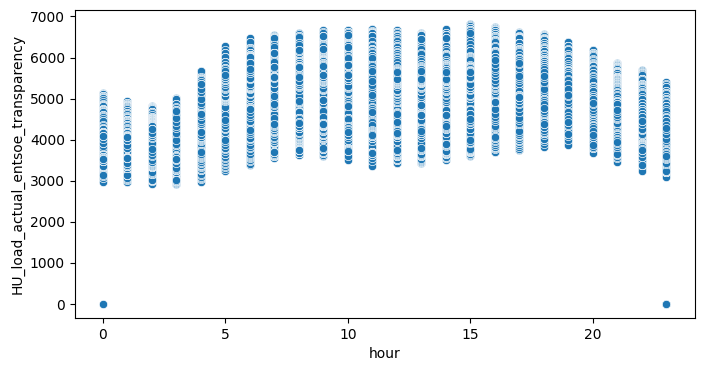

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_hu_min_avg, x='hour', y='HU_load_actual_entsoe_transparency')
plt.show()